### 0. Food for thought

If you think about, Time Series are all around you. For example, stock market, food prices, how much water you use at home daily or how frequent you opening your Facebook app. Time series, basically put all the information in relation of time.

What you have seen in a lecture, that is the gist of it. We could go deeper in mathematic and probability, but the main key to identify how a certian phenonmena behave in time:
* Is the electricity price increasing (upward trend)
* Are we using more water at the weekend (weekly seasonality)
* Sudden increase in online purchase during 2020 (irregularity)
* House purchase over the years. (Cyclicity)

When you recieve a time series, you want to answer some question, by just looking at the data:
* Can I see some trending or seasonal behavior with my data
* Can make an educated guess about the next probable value
* Does it look like a random noise ? it is? then lets do some crunching, is it really a noise.

### 1. Importing libraries

As you may already know, we need some libaries to use some predifined function, so we do not need to reinvent the wheel. So lets use other people work. (That is called open-source)

We are going to use in the first part of the exercise the __datetime__ base library and __pandas__ data wrangling library. It is a good practise to use __as__ for shortening the names.

In [1]:
import datetime as dt
import pandas as pd

### 2. Loading the Dataset
* Load data with the __pd.read_csv__ function by specifying the location of the dataset, which is in your __data__ folder.
* After loading the data, it is good to see how the data was loaded. Sometime, we can spot some errors in the original dataset.

In [2]:
air_pass = pd.read_csv("data/AirPassengers.csv")
air_pass.head(1)

,Month,#Passengers
0,1949-01,112.0


### 3. Analyzing the data

After you are confirmed that the data was loaded correctly, you always want to start with getting to know the dataset. Without knowing what our dataset contains, we don't know what it is that we are working with. This step sets up the possibilty for you to identify missing or incorrect data. It is an important prerequisite for data cleaning!

In [3]:
air_pass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Month        144 non-null    object 
 1   #Passengers  141 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


### 4. Cleaning the Data
After identifying the general characteristics of our dataset, we can clean it up. Below, you can see a couple of queries that you can perform to make your data cleaner. Clean data is the fundation of a good data analysis! Cleaning the dataset can include, but is not limited to:

* Dealing with missing values
    * Instead of removing the missing values, let's interpolate (create a new values, based their neighbouring values.)  
* Formating date columns
    * Let's create a separate date column, plus a separate year and month
* Adding calculated columns
    * And let's create and extra column based on how many data we have in a year.

After we are satisfied with the cleanliness of our dataset, we should always save it under a new name. This allows you to look back at the original dataset easily and have a clear separation between the cleaned and raw dataset. You do not have to run the cleaning code again, and can simply work with the already cleaned dataset next time you open up the code.

In [4]:
#we don't like # and capital letter in the column name, so we will rename it
air_pass.rename(columns={"#Passengers": "passengers"}, inplace=True)

#count missing values by columns
print("Check for missing values:")
print(air_pass.isnull().sum())
#We can see we have 3 in the passengers column
# Let's interpolate the missing values, based on their previous and next values
air_pass["passengers"].interpolate(inplace=True)

#Did we succeed?
print("Check for missing values:")
print(air_pass.isnull().sum())

#Create the date, year, month  and drop the Month column
air_pass["date"] = pd.to_datetime(air_pass["Month"], format="%Y-%m")
air_pass["year"] = air_pass["date"].dt.year
air_pass["month"] = air_pass["date"].dt.month

air_pass.drop("Month", axis=1, inplace=True)

#Set the column order
air_pass = air_pass[["date","year", "month","passengers"]]

#Check the data types
air_pass.dtypes

Check for missing values:
Month         0
passengers    3
dtype: int64
Check for missing values:
Month         0
passengers    0
dtype: int64


date          datetime64[ns]
year                   int64
month                  int64
passengers           float64
dtype: object

In [5]:
#Lets set the year and month as the index
air_pass.set_index(["year","month"], inplace=True)
air_pass

date  passengers
year month                       
1949 1     1949-01-01       112.0
     2     1949-02-01       118.0
     3     1949-03-01       132.0
     4     1949-04-01       129.0
     5     1949-05-01       121.0
...               ...         ...
1960 8     1960-08-01       606.0
     9     1960-09-01       508.0
     10    1960-10-01       461.0
     11    1960-11-01       390.0
     12    1960-12-01       432.0

[144 rows x 2 columns]


### 5. Exploratory Data Analysis (EDA)

* Data Exploration is one of the most crucial part of Time Series analysis. Here we can understand, our dataset, making pleliminary assumptions (hypothesis).
* First we can make some descriptive statistic on the dataset, so we know what range our data moving.

In [6]:
#Check the descriptive statistics of the data
print(air_pass.describe())

#Which year has the highest number of passengers?
pass_year_max = air_pass.groupby(air_pass["date"].dt.year)["passengers"].sum().sort_values(ascending=False)

#Which year has the lowest number of passengers?
pass_year_min = air_pass.groupby(air_pass["date"].dt.year)["passengers"].sum().sort_values(ascending=True)


print(
    f"The year with the highest number of passengers is: {pass_year_max.index[0]}"
)
print(
    f"The year with the lowest number of passengers is: {pass_year_min.index[0]}"
)

       passengers
count  144.000000
mean   280.458333
std    120.291364
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000
The year with the highest number of passengers is: 1960
The year with the lowest number of passengers is: 1949


In [7]:
#Get the the month with the highest number of passengers each year
air_pass.groupby(air_pass["date"].dt.year)["passengers"].agg(
    max_passangers="max", 
    month="idxmax"
)
#Without plotting we can see that the month with the highest number of passengers is July
#That is indicating some seasonality in the data

,max_passangers,month
date,,
1949,148.0,"(1949, 7)"
1950,170.0,"(1950, 7)"
1951,199.0,"(1951, 7)"
1952,242.0,"(1952, 8)"
1953,272.0,"(1953, 8)"
1954,302.0,"(1954, 7)"
1955,364.0,"(1955, 7)"
1956,413.0,"(1956, 7)"
1957,467.0,"(1957, 8)"


In [8]:
#let see how the yearly mean of the passengers is changing over time
air_pass_mean = air_pass.groupby(air_pass["date"].dt.year)["passengers"].mean()
print(air_pass_mean)

#We can see that the mean number of passengers is increasing over time
#That is indicating some trend in the data

#lets add date back to the sub dataset
air_pass_mean = air_pass_mean.reset_index()
air_pass_mean["date"] = pd.to_datetime(air_pass_mean["date"], format="%Y")

date
1949    126.666667
1950    139.666667
1951    170.166667
1952    197.000000
1953    224.916667
1954    238.916667
1955    284.000000
1956    328.250000
1957    368.416667
1958    381.000000
1959    429.333333
1960    477.166667
Name: passengers, dtype: float64


In [71]:
#let see how the yearly standard of the passengers is changing over time
air_pass_std = air_pass.groupby(air_pass["date"].dt.year)["passengers"].std()
print(air_pass_std)
#We can see that the standard deviation of passengers is increasing over time as well
#That is indicating that this time series has some multiplicative component

#lets add date back to the sub dataset
air_pass_std = air_pass_std.reset_index()
air_pass_std["date"] = pd.to_datetime(air_pass_std["date"], format="%Y")
air_pass_std

date
1949    13.720147
1950    19.070841
1951    18.438267
1952    22.966379
1953    28.560807
1954    34.924486
1955    42.140458
1956    47.861780
1957    57.890898
1958    64.530472
1959    70.594016
1960    78.634752
Name: passengers, dtype: float64


,date,passengers
0,1949-01-01,13.720147
1,1950-01-01,19.070841
2,1951-01-01,18.438267
3,1952-01-01,22.966379
4,1953-01-01,28.560807
5,1954-01-01,34.924486
6,1955-01-01,42.140458
7,1956-01-01,47.861780
8,1957-01-01,57.890898
9,1958-01-01,64.530472


### 6. Visualisation

What we did, by the nummerical/programmatic checking, we can do it sometime just looking at the data. Why sometimes? Because data come every shape and form, and the world random enough to present itself with tricky information, which is not apperent to see for the first glance.

In [12]:
#Let's plot the data 
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(air_pass["date"], air_pass["passengers"])
plt.title("Number of passengers over time")
plt.xlabel("Date")
plt.ylabel("Number of passengers")
plt.show()


KeyError: 'date'

<Figure size 1500x500 with 0 Axes>

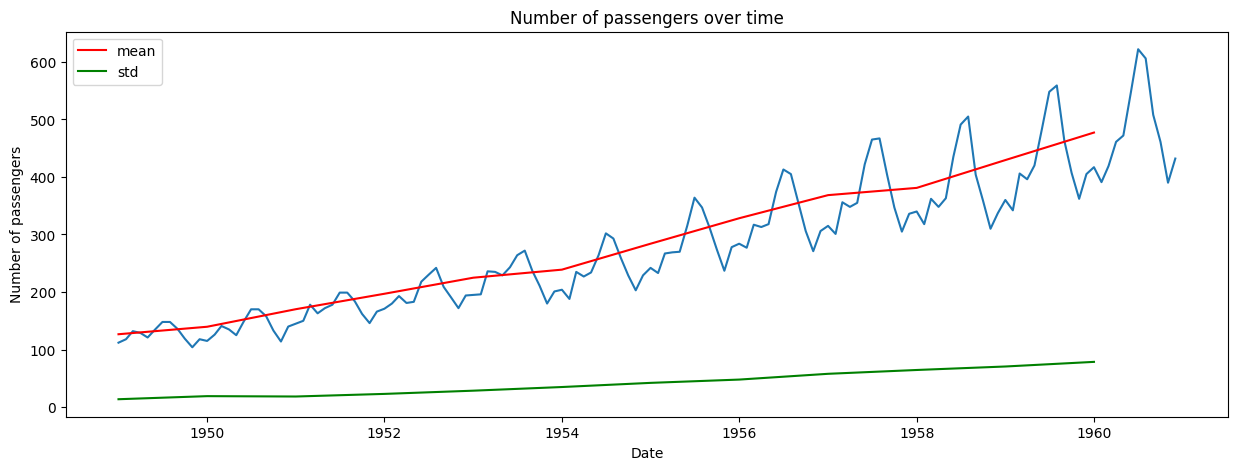

In [73]:
#lets add the calculated mean and variance to the plot
plt.figure(figsize=(15, 5))
plt.plot(air_pass["date"], air_pass["passengers"])
plt.plot(air_pass_mean["date"], air_pass_mean["passengers"], color="red", label="mean")
plt.plot(air_pass_std["date"], air_pass_std["passengers"], color="green", label="std")
plt.title("Number of passengers over time")
plt.legend(loc="best")
plt.xlabel("Date")
plt.ylabel("Number of passengers")
plt.show()

#We can see that the mean is increasing over time and the variance is increasing as well
#That is indicating that this time series has some multiplicative component and it is non-stationary
#also we can see that there is some seasonality in the data

### 5 ext. Exploratory Data Analysis (EDA) EXTRA

Lets use some addintional libraries which out of the box helps to decompose our dataset, to see some trend, seasonality and irregularites.


In [9]:
#Decompose the time series into trend, seasonality and residuals
from statsmodels.tsa.seasonal import seasonal_decompose

#Lets drop the year and month index
air_pass.reset_index(inplace=True)
air_pass.drop(["year", "month"], axis=1, inplace=True)
air_pass.set_index("date", inplace=True)

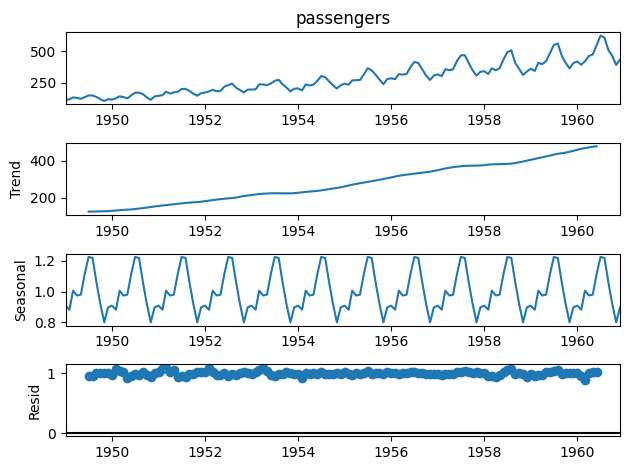

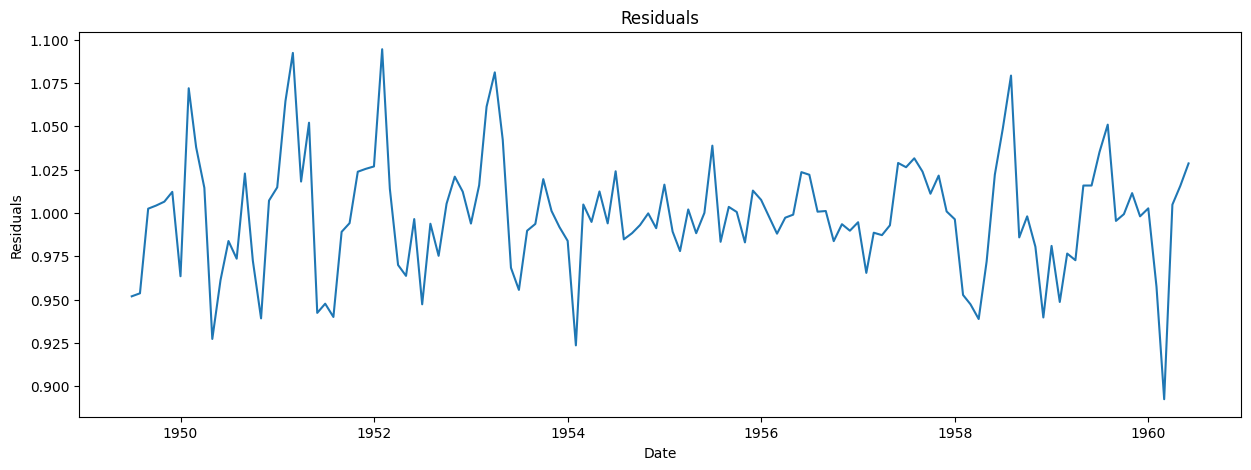

In [13]:
#Lets do some decomposition
air_decomp = seasonal_decompose(air_pass["passengers"] , model="multiplicative")

air_decomp.plot()
#The residuals are not clearly visible, so lets plot them separately
plt.figure(figsize=(15, 5))
plt.plot(air_decomp.resid)
plt.title("Residuals")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.show()
#That looks random.


When we are dealing with Time Series, we are doing so to be able to use them to predict the future. We want to see whether the past data can indicate a future behavior and possibly we can take an action, or utilize the predictions.

There are miriad of models and algorithms have been developed over the years in order to predict future. But most of them rely on one specific feature of the time series, that is it stationary or not.

So let's see

In [76]:
#In the previous task we have seen that the time series is non-stationary, by looking at the mean and variance
#and also we have seen that there is some seasonality in the data by looking at the plot
#Lets check if the time series is stationary by using the Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

#Lets create a function to check if the time series is stationary
def check_stationarity(timeseries):

    #Determing rolling statistics
    #Rolling statistics is used to check if the mean and variance is constant over time
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    plt.figure(figsize=(15, 5))
    plt.plot(timeseries, color="blue", label="Original")
    plt.plot(rolmean, color="red", label="Rolling Mean")
    plt.plot(rolstd, color="black", label="Rolling Std")
    plt.legend(loc="best")
    plt.title("Rolling Mean & Standard Deviation")
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput[f"Critical Value ({key})"] = value
    print(dfoutput)

Augmented Dickey Fuller test or (ADF Test) is the most commonly used test to detect stationarity. Here, we assume (inn statistics we say the null-hypothesis) the time series is non-stationary. Then, we collect evidence to support or reject our assumptions(null hypothesis). So, if we find that the __p-value__ in ADF test is less than the significance level (__0.05__), we can reject our assumptions and we can declare the timeseries is stationary.

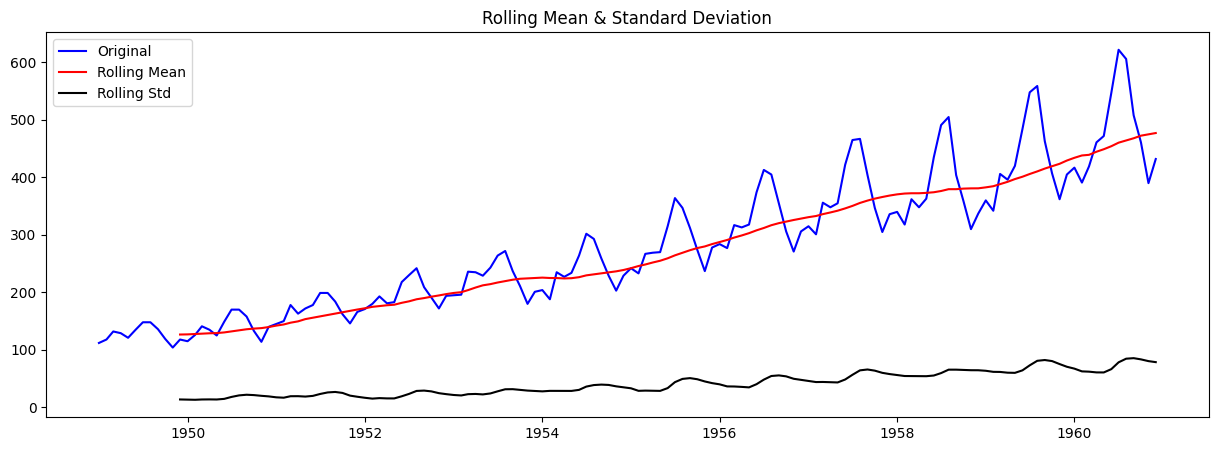

Results of Dickey-Fuller Test:
Test Statistic                   0.813749
p-value                          0.991855
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [77]:
check_stationarity(air_pass["passengers"])
#The p-value is greater than 0.05, so we can not reject our assumption that the time series is non-stationary

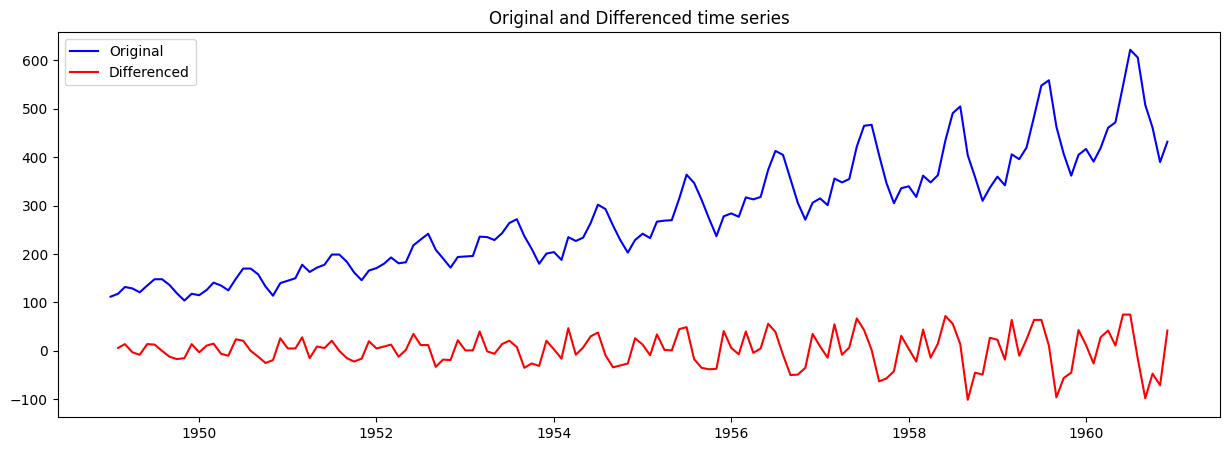

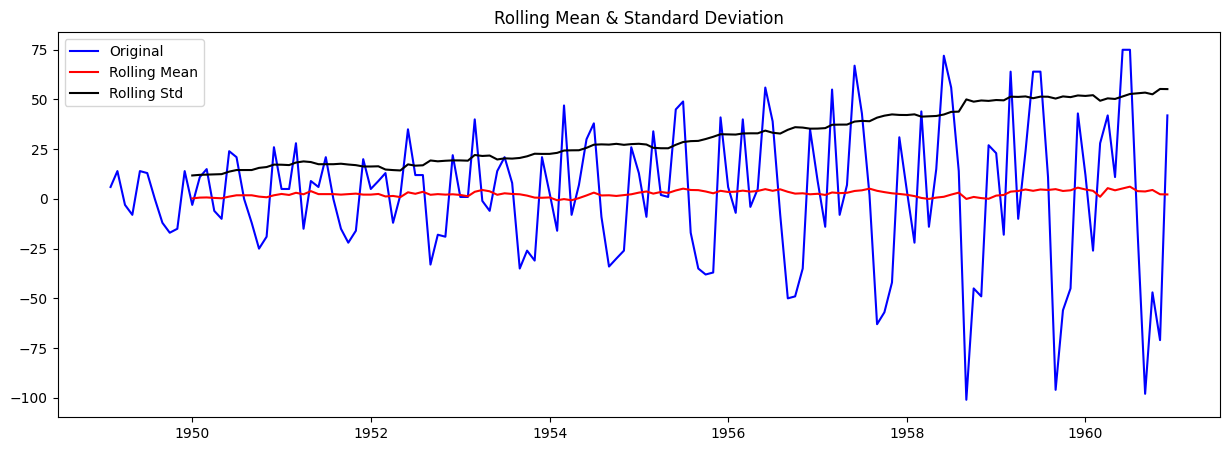

Results of Dickey-Fuller Test:
Test Statistic                  -2.812035
p-value                          0.056575
#Lags Used                      12.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [78]:
#Lets do some differencing , shall we?
air_pass["passengers_diff"] = air_pass["passengers"] - air_pass["passengers"].shift(1)

#Let's plot the differenced time series with the original time series
plt.figure(figsize=(15, 5))
plt.plot(air_pass["passengers"], color="blue", label="Original")
plt.plot(air_pass["passengers_diff"], color="red", label="Differenced")
plt.legend(loc="best")
plt.title("Original and Differenced time series")
plt.show()

#Hmm, that's seems to remove the trend, but the variance is still increasing over time
#Lets check if the time series is stationary by using the Augmented Dickey-Fuller test

check_stationarity(air_pass["passengers_diff"][1:])

#Almost there, but the p-value is still greater than 0.05, so we can not reject our assumption that the time series is non-stationary


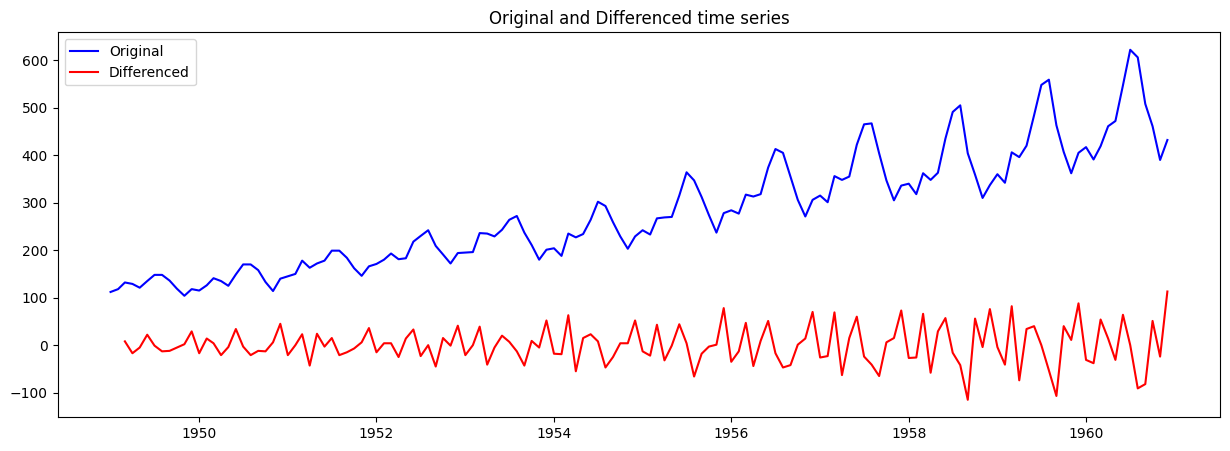

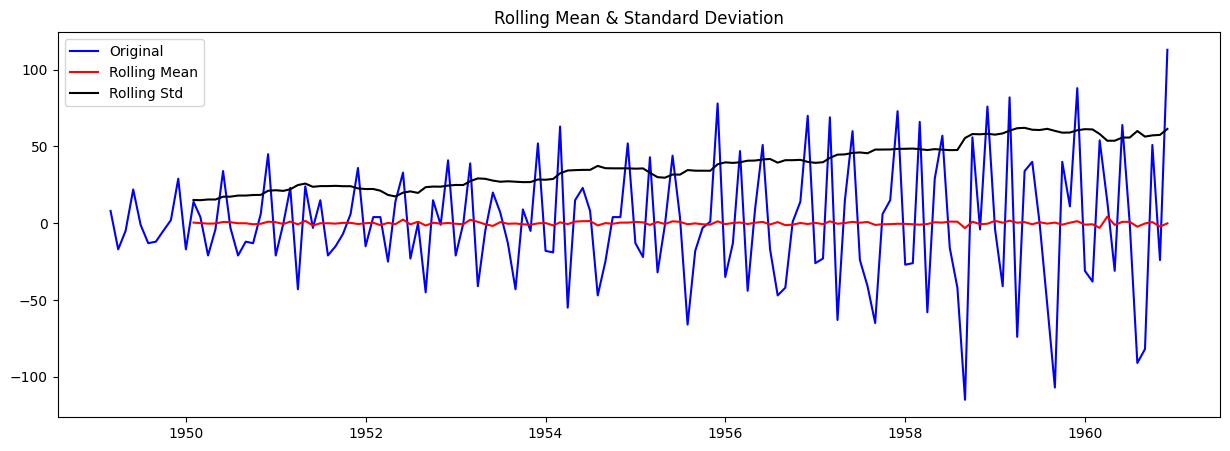

Results of Dickey-Fuller Test:
Test Statistic                -1.623281e+01
p-value                        3.796347e-29
#Lags Used                     1.100000e+01
Number of Observations Used    1.300000e+02
Critical Value (1%)           -3.481682e+00
Critical Value (5%)           -2.884042e+00
Critical Value (10%)          -2.578770e+00
dtype: float64


In [79]:
#Lets do some differencing again.
air_pass["passengers_diff2"] = air_pass["passengers_diff"] - air_pass["passengers_diff"].shift(1)

#Let's plot the differenced time series with the original time series
plt.figure(figsize=(15, 5))
plt.plot(air_pass["passengers"], color="blue", label="Original")
plt.plot(air_pass["passengers_diff2"], color="red", label="Differenced")
plt.legend(loc="best")
plt.title("Original and Differenced time series")
plt.show()

check_stationarity(air_pass["passengers_diff2"][2:])
#Finally the p-value is less than 0.05, so we can reject our assumption that the time series is non-stationary
#But to be sure, we should do a little bit more differencing.

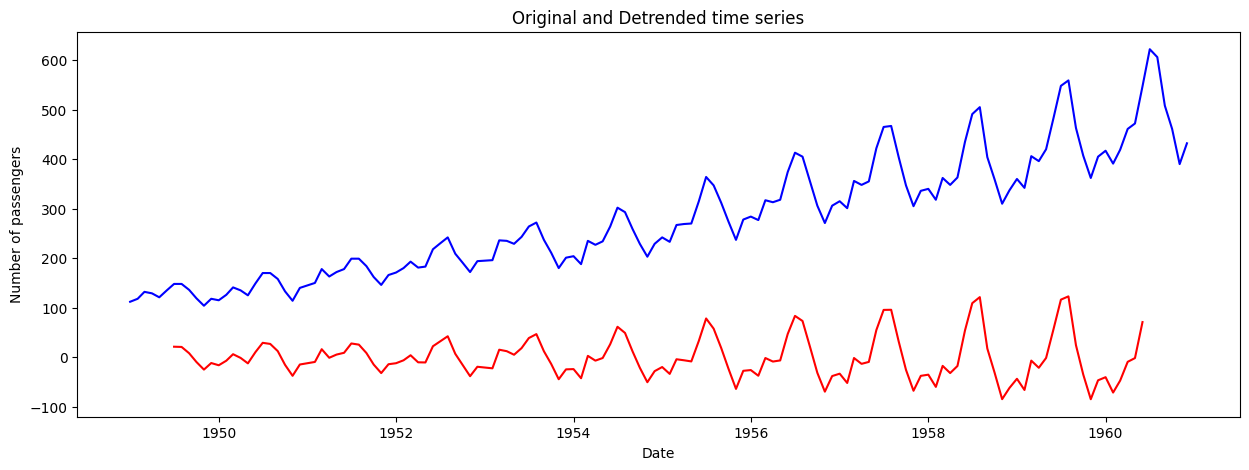

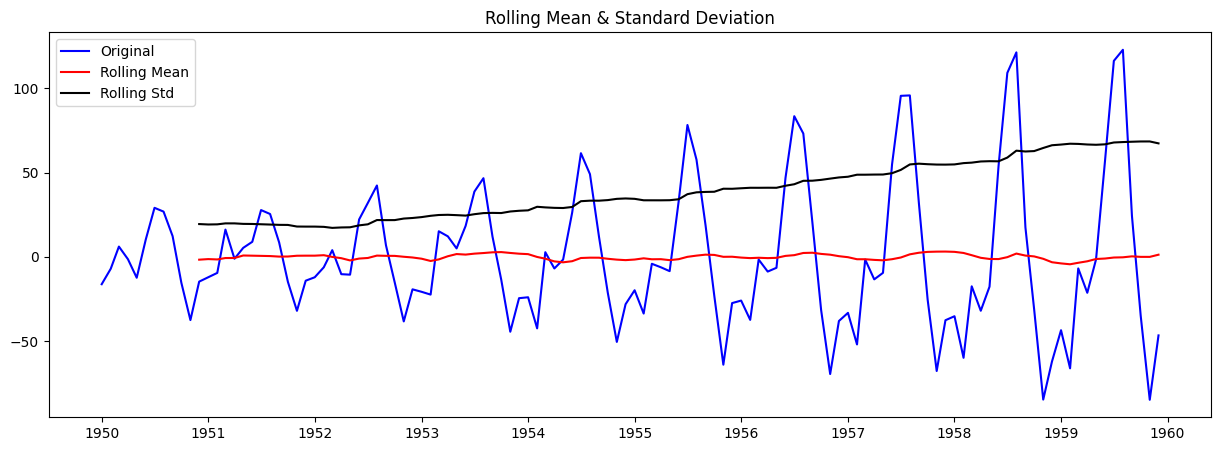

Results of Dickey-Fuller Test:
Test Statistic                  -4.450471
p-value                          0.000241
#Lags Used                      13.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


In [98]:
#We can do the same by using the output from the seasonal_decompose function
detrended = air_pass['passengers'].values - air_decomp.trend

#Lets plot the detrended time series with the original time series
plt.figure(figsize=(15, 5))
plt.plot(air_pass["passengers"], color="blue", label="Original")
plt.plot(detrended, color="red", label="Detrended")
plt.title("Original and Detrended time series")
plt.xlabel("Date")
plt.ylabel("Number of passengers")
plt.show()

#Lets check if the time series is stationary by using the Augmented Dickey-Fuller test
check_stationarity(detrended[12:-12])

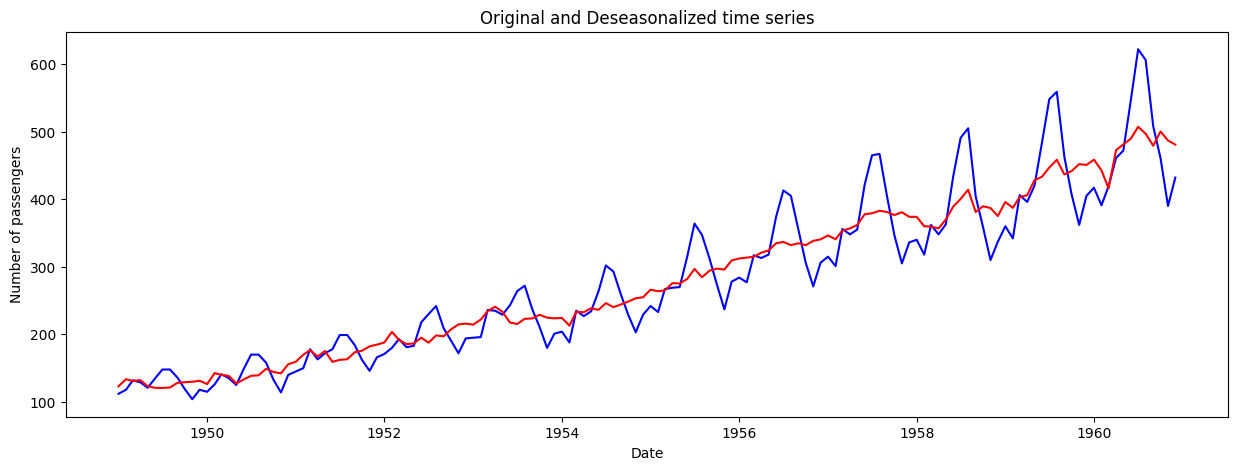

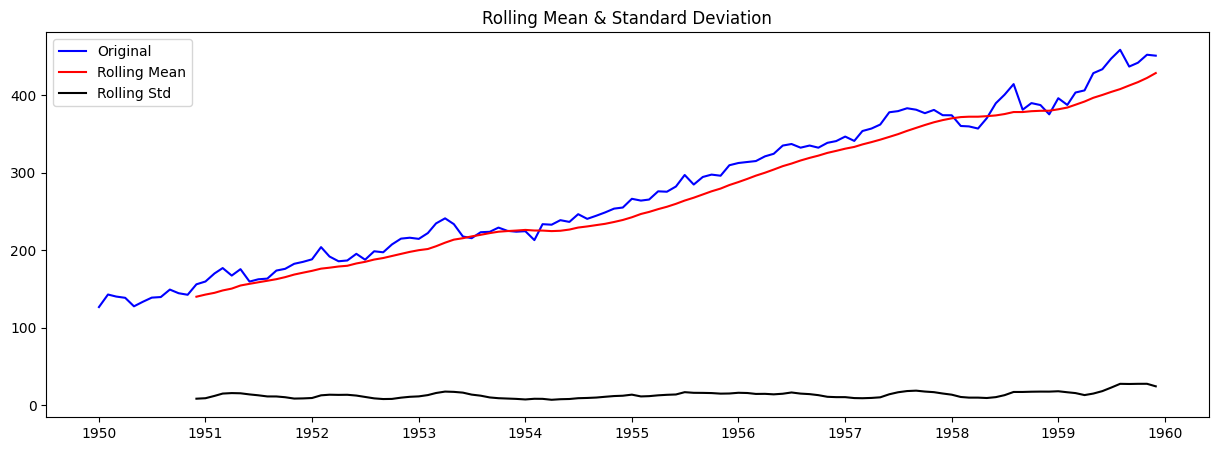

Results of Dickey-Fuller Test:
Test Statistic                   0.945803
p-value                          0.993660
#Lags Used                       8.000000
Number of Observations Used    111.000000
Critical Value (1%)             -3.490683
Critical Value (5%)             -2.887952
Critical Value (10%)            -2.580857
dtype: float64


In [100]:
#lets remove the seasonality
deseasonal = air_pass['passengers'].values / air_decomp.seasonal

#Lets plot the deseasonalized time series with the original time series
plt.figure(figsize=(15, 5))
plt.plot(air_pass["passengers"], color="blue", label="Original")
plt.plot(deseasonal, color="red", label="Deseasonalized")
plt.title("Original and Deseasonalized time series")
plt.xlabel("Date")
plt.ylabel("Number of passengers")
plt.show()

#Lets check if the time series is stationary by using the Augmented Dickey-Fuller test
check_stationarity(deseasonal[12:-12])

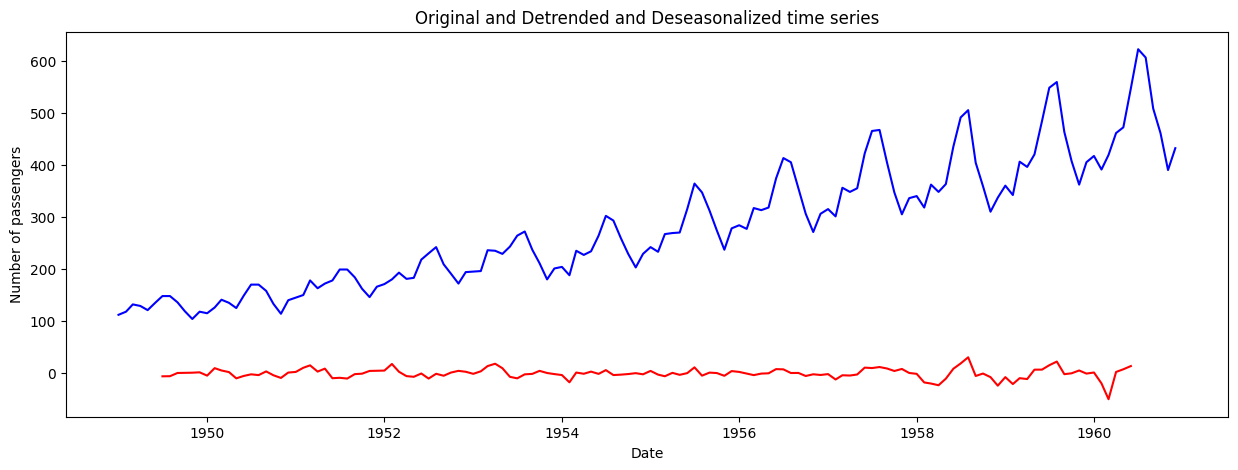

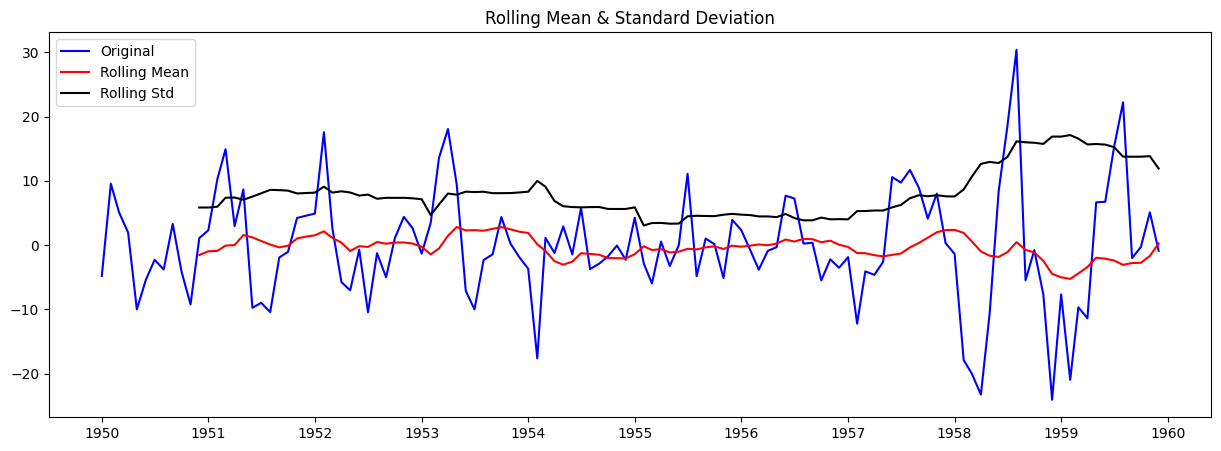

Results of Dickey-Fuller Test:
Test Statistic                -7.167063e+00
p-value                        2.868075e-10
#Lags Used                     7.000000e+00
Number of Observations Used    1.120000e+02
Critical Value (1%)           -3.490131e+00
Critical Value (5%)           -2.887712e+00
Critical Value (10%)          -2.580730e+00
dtype: float64


In [101]:
#Lets remove the trend and seasonality
detrended_deseasonal = air_pass['passengers'].values / air_decomp.seasonal - air_decomp.trend

#Lets plot the detrended and deseasonalized time series with the original time series
plt.figure(figsize=(15, 5))
plt.plot(air_pass["passengers"], color="blue", label="Original")
plt.plot(detrended_deseasonal, color="red", label="Detrended and Deseasonalized")
plt.title("Original and Detrended and Deseasonalized time series")
plt.xlabel("Date")
plt.ylabel("Number of passengers")
plt.show()

#Lets check if the time series is stationary by using the Augmented Dickey-Fuller test
check_stationarity(detrended_deseasonal[12:-12])
#Thats it for this task, in the next task we will look at how to forecast time series data.

###  7. Interpretation of the results

#Let's say we are in the 1961 and it is September and our company want to invest in the aviation industry. They come to us, to analyze the market, and give some preliminary information.

* Does it make sense to invest in this industry?
    * Well looking at the last decade (50's), the tickets sales were showing an upward trend.
* But it seems the September ticket sales dropped significantly compared to the August.
    * This is not new, we have seen the same tendency (seasonality) that after the summer holidays, the sales at the begining will start to rise.